# 可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。



## 导入工具包

In [1]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [5]:
# 日志文件路径
log_path = 'mmdetection/work_dirs/rtmdet_nano_320-8xb32_coco-person/20241129_155112/vis_data/scalars.json'

# log_path = 'work_dirs/rtmdet_tiny_triangle/20230511_234855/vis_data/scalars.json'

In [6]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [7]:
len(json_list)

649

In [6]:
eval(json_list[4])

{'base_lr': 0.0011331618018017996,
 'lr': 0.0011331618018017996,
 'data_time': 0.03653771877288818,
 'loss': 1.6031950521469116,
 'loss_cls': 0.4719358998537064,
 'loss_bbox': 1.1312591528892517,
 'time': 0.6098063182830811,
 'epoch': 3,
 'iter': 284,
 'memory': 2369,
 'step': 284}

In [7]:
import pandas as pd
from tqdm import tqdm

df_train = pd.DataFrame()
df_test = pd.DataFrame()

for each in tqdm(json_list):
    data = eval(each)  # 将 JSON 字符串转换为 Python 对象
    if 'coco/bbox_mAP' in each:
        df_test = pd.concat([df_test, pd.DataFrame([data])], ignore_index=True)
    else:
        df_train = pd.concat([df_train, pd.DataFrame([data])], ignore_index=True)


100%|██████████| 649/649 [00:00<00:00, 1414.81it/s]


In [8]:
df_train

,base_lr,lr,data_time,loss,loss_cls,loss_bbox,time,epoch,iter,memory,step
0,0.000196,0.000196,0.085683,0.699358,0.076544,0.622814,0.839950,1,50,2369,50
1,0.000396,0.000396,0.003825,1.915496,0.375081,1.540414,0.551844,1,100,2369,100
2,0.000665,0.000665,0.038464,1.691230,0.448167,1.243062,0.610439,2,167,2369,167
3,0.000865,0.000865,0.003369,1.637597,0.445150,1.192447,0.560549,2,217,2369,217
4,0.001133,0.001133,0.036538,1.603195,0.471936,1.131259,0.609806,3,284,2369,284
...,...,...,...,...,...,...,...,...,...,...,...
595,0.000202,0.000202,0.004088,0.695447,0.316153,0.379293,0.543623,298,34849,2369,34849
596,0.000201,0.000201,0.027073,0.700780,0.316919,0.383861,0.575968,299,34916,2369,34916
597,0.000201,0.000201,0.004006,0.691584,0.310906,0.380678,0.542242,299,34966,2369,34966
598,0.000200,0.000200,0.028166,0.693472,0.311796,0.381676,0.578286,300,35033,2369,35033


In [9]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,data_time,time,step
0,0.012,0.036,0.006,0.001,0.007,0.028,0.006727,0.053715,10
1,0.042,0.118,0.022,0.002,0.028,0.100,0.003420,0.046293,20
2,0.060,0.163,0.030,0.004,0.056,0.128,0.003677,0.048276,30
3,0.101,0.250,0.063,0.008,0.092,0.215,0.003550,0.047558,40
4,0.131,0.298,0.096,0.010,0.125,0.271,0.003558,0.047682,50
5,0.149,0.328,0.119,0.013,0.149,0.302,0.003517,0.047387,60
6,0.167,0.354,0.136,0.015,0.169,0.332,0.003675,0.050781,70
7,0.181,0.374,0.159,0.019,0.183,0.360,0.003661,0.049166,80
8,0.195,0.392,0.173,0.021,0.195,0.386,0.003631,0.048653,90
9,0.206,0.406,0.181,0.024,0.205,0.403,0.003655,0.048395,100


## 导出训练日志表格

In [10]:
df_train.to_csv('work_dirs/rtmdet_nano_320-8xb32_coco-person/20241129_155112/vis_data/训练日志-训练集.csv', index=False)
df_test.to_csv('work_dirs/rtmdet_nano_320-8xb32_coco-person/20241129_155112/vis_data/训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [11]:
# # windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [12]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

[解决不显示中文](https://blog.csdn.net/BIT_666/article/details/122365074)

In [13]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /home/dshengq/SimHei.ttf
!rm -rf /home/dshengq/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


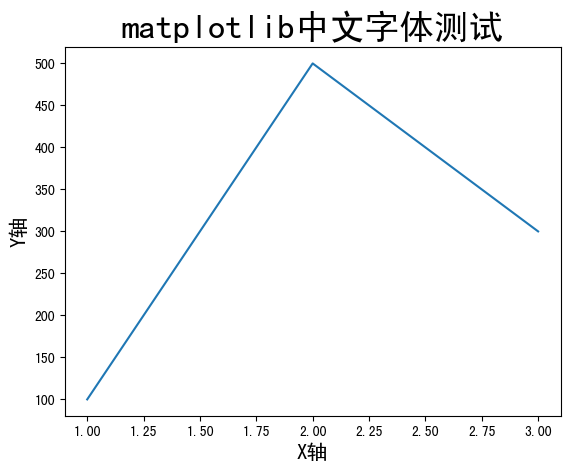

In [16]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [28]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [29]:
df_train.columns

Index(['base_lr', 'lr', 'data_time', 'loss', 'loss_cls', 'loss_bbox', 'time',
       'epoch', 'iter', 'memory', 'step'],
      dtype='object')

In [32]:
# metrics = ['loss', 'loss_bbox', 'loss_cls', 'loss_rpn_cls', 'loss_rpn_bbox']
metrics = ['loss', 'loss_bbox', 'loss_cls', 'lr', 'base_lr']


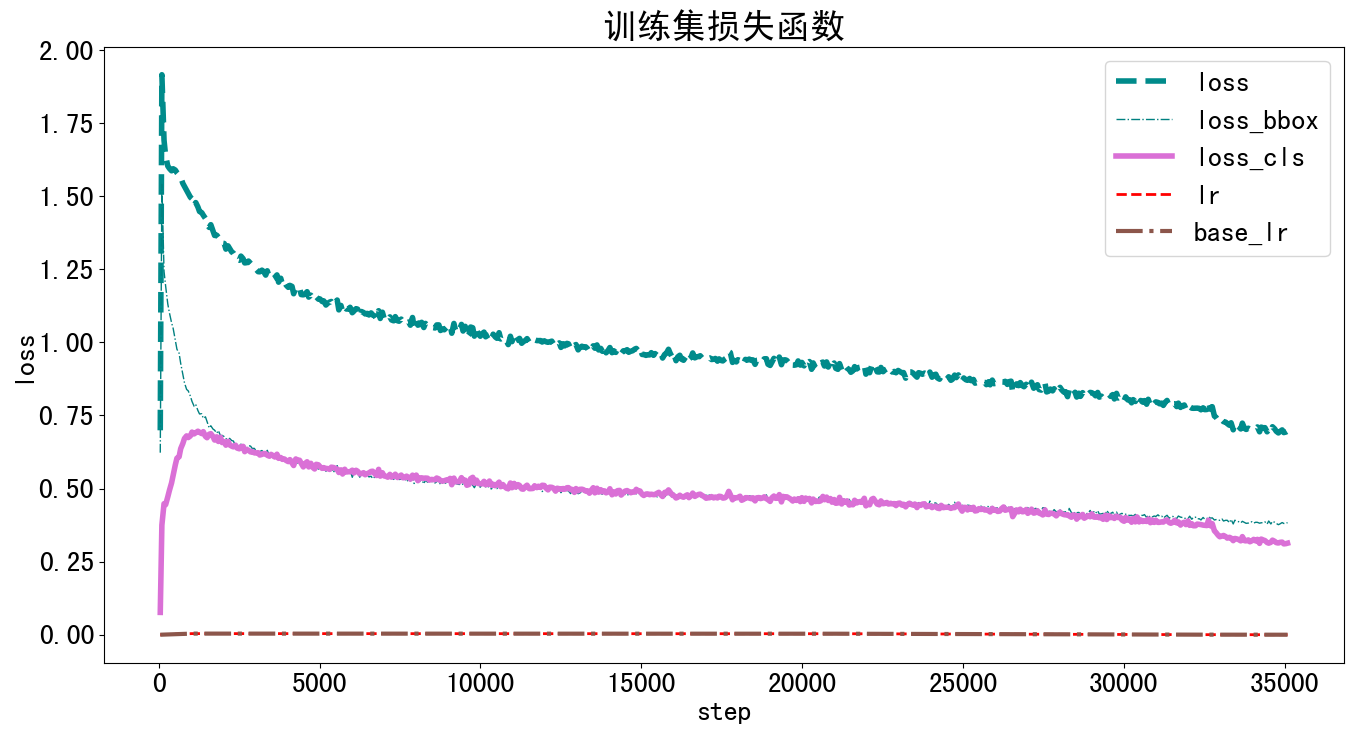

In [33]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率（如果图是空的，说明没有`acc`这个指标，跳过本图即可）

In [34]:
metrics = ['acc']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


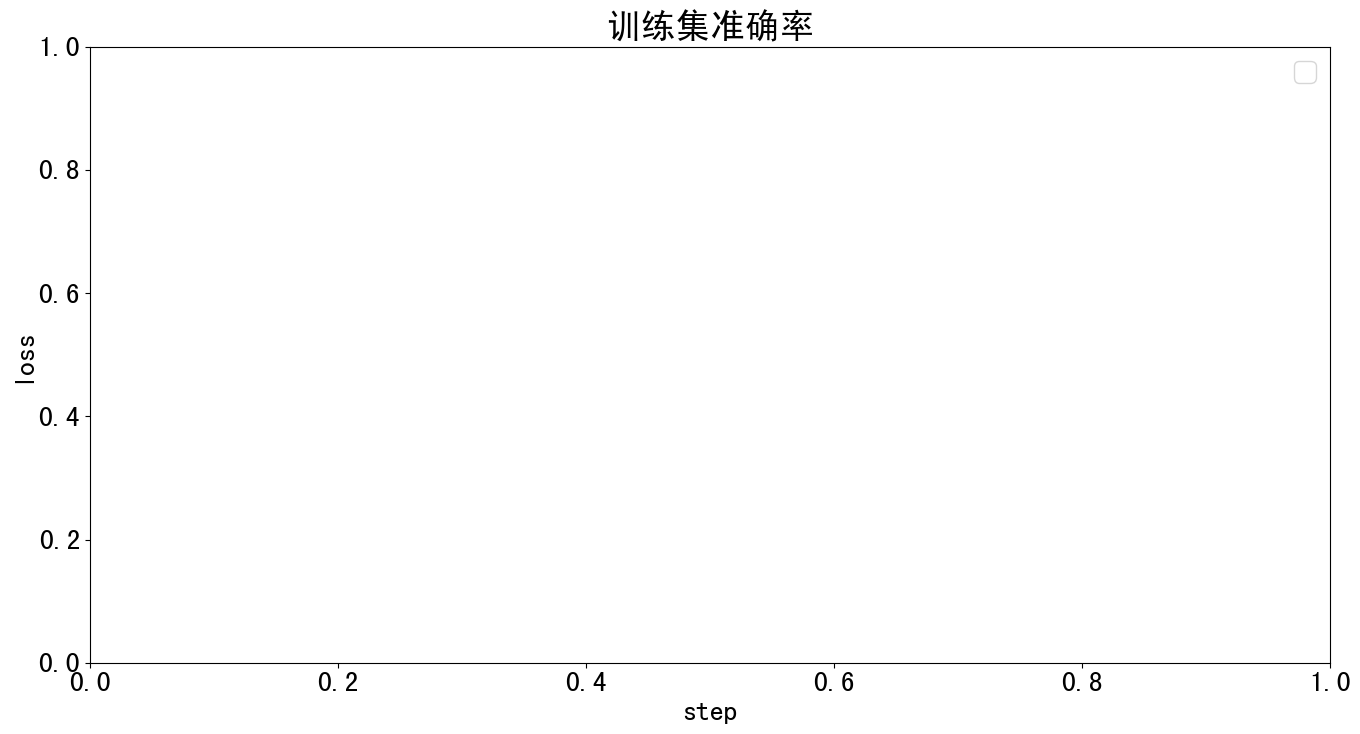

In [35]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [36]:
df_test.columns

Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l', 'data_time',
       'time', 'step'],
      dtype='object')

In [37]:
metrics = ['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l']

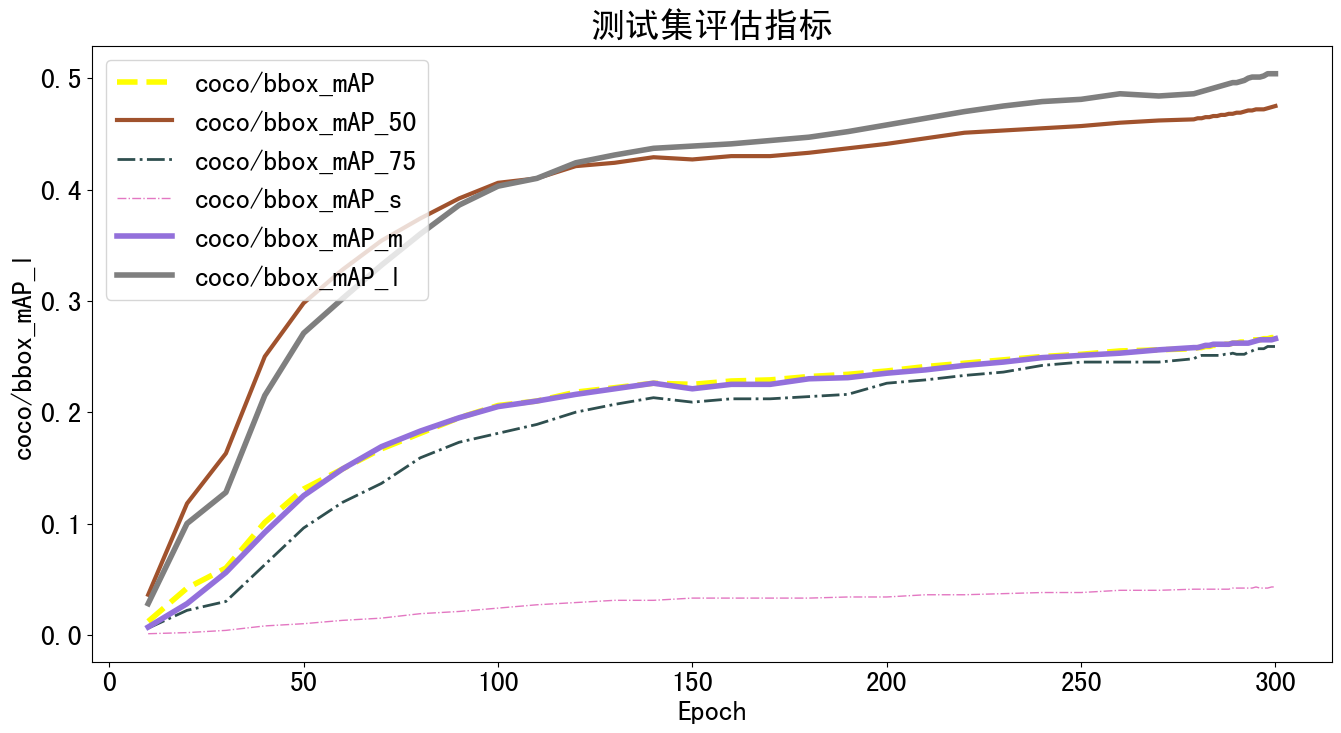

In [38]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-PASCAL VOC Metric（如果生成的图是空的，说明没有pascal voc指标，跳过本图即可）

In [26]:
metrics = ['pascal_voc/mAP', 'pascal_voc/AP50']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


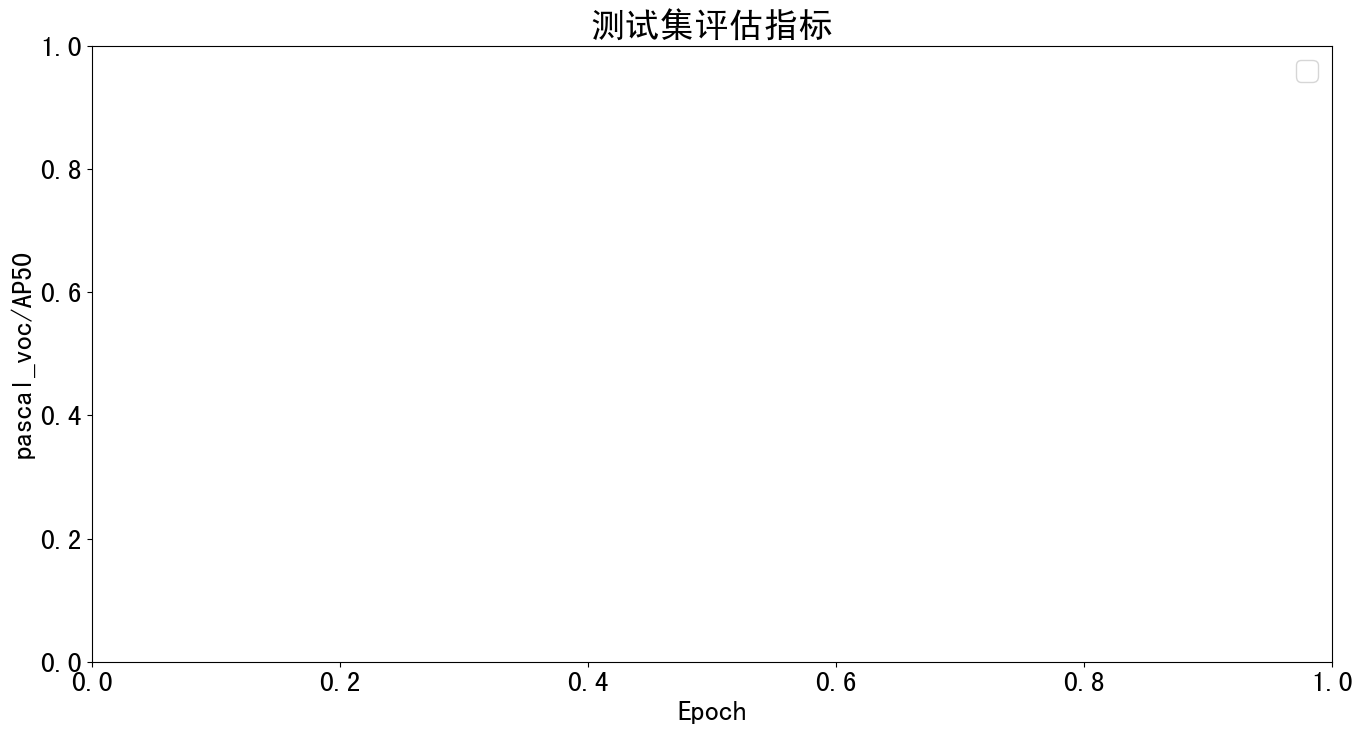

In [27]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()